## Chen Anhua's PS 6
### (a)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
biden = pd.read_csv('biden.csv')
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [3]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)
biden_tree = DecisionTreeRegressor()
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [4]:

biden_tree_viz = export_graphviz(biden_tree, 
                                 out_file=None, 
                                 rounded=True, 
                                 filled=True, 
                                feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']))

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [5]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE1)


Test MSE= 715.510377647


According to the first node, Republican/Democrats play a huge part in splitting the tree. And across layers, female seems to hold a warmer attitudes towards Biden.

### (b)

In [6]:
for d in range(1,20):
    biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
    biden_tree2.fit(X_train, y_train)
    y_pred2 = biden_tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred2)
    print("Max_depth of: ", d, " has a MSE of: ", MSE2)

Max_depth of:  1  has a MSE of:  420.022452935
Max_depth of:  2  has a MSE of:  400.065398184
Max_depth of:  3  has a MSE of:  396.193714632
Max_depth of:  4  has a MSE of:  404.596023623
Max_depth of:  5  has a MSE of:  411.805927372
Max_depth of:  6  has a MSE of:  418.602266631
Max_depth of:  7  has a MSE of:  435.94288763
Max_depth of:  8  has a MSE of:  464.893144971
Max_depth of:  9  has a MSE of:  460.249577807
Max_depth of:  10  has a MSE of:  468.332971959
Max_depth of:  11  has a MSE of:  470.993108457
Max_depth of:  12  has a MSE of:  480.784236044
Max_depth of:  13  has a MSE of:  476.986966205
Max_depth of:  14  has a MSE of:  479.933911633
Max_depth of:  15  has a MSE of:  481.850195738
Max_depth of:  16  has a MSE of:  480.87183478
Max_depth of:  17  has a MSE of:  482.84236885
Max_depth of:  18  has a MSE of:  480.550678694
Max_depth of:  19  has a MSE of:  482.668542414


optimal max_depth is 3

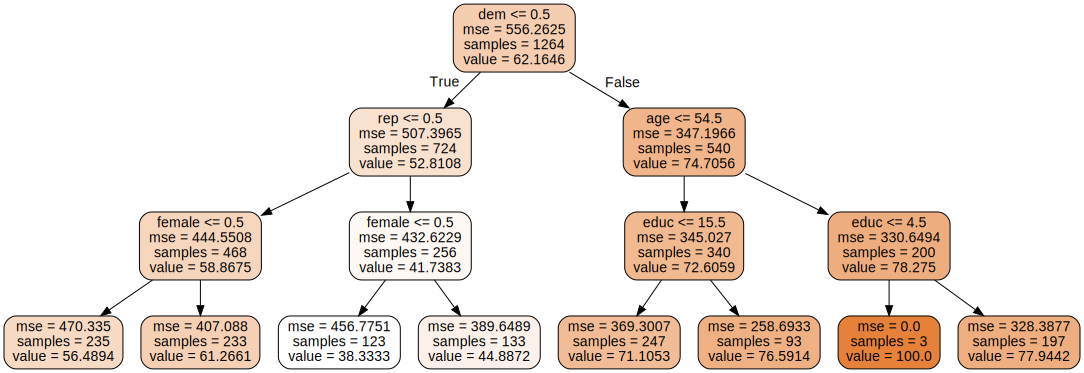

In [7]:
biden_tree2 = DecisionTreeRegressor(max_depth=3)
biden_tree2.fit(X_train, y_train)

biden_tree_viz2 = export_graphviz(biden_tree2, 
                                 out_file=None, 
                                 rounded=True, 
                                 filled=True, 
                                feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']))

graph = graphviz.Source(biden_tree_viz2)
graph.render('biden_tree_viz2')
graph

Tree using 3 as max_depth shares roughly the same structure as the first 3-layer in the tree in (a). MSE has improved to 396.193714632

### (c)

In [8]:
from sklearn.ensemble import BaggingRegressor
biden_tree_3 = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators=100, max_samples=100, 
                                bootstrap=True, oob_score=True, 
                          random_state=25)
biden_tree_3.fit(X, y)
biden_tree_3.score(X, y)
y_pred = biden_tree_3.oob_prediction_
MSE = mean_squared_error(y, y_pred)
print(MSE)

405.263562827


In [9]:
importances = np.mean([tree.feature_importances_ for tree in biden_tree_3.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
vars_ = ['female', 'age', 'dem', 'rep', 'educ']
for i in range(5):
    print(vars_[i],':', importances[indices[i]])


female : 0.440843112365
age : 0.204585294454
dem : 0.184021781064
rep : 0.112328510305
educ : 0.0582213018121


### (d)

In [10]:
from sklearn.ensemble import RandomForestRegressor
for m in range(3):
    tree = RandomForestRegressor(n_estimators=100, max_features=m+1, bootstrap=True,
                                  oob_score=True, random_state=25)
    tree.fit(X, y)
    tree.score(X, y)
    y_pred = tree.oob_prediction_
    
    
    MSE = mean_squared_error(y, y_pred)
    print('When m is ', m+1 ,', MSE =' , MSE)
    
    importances = tree.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    vars_ = ['female', 'age', 'dem', 'rep', 'educ']
    for i in range(X.shape[1]):
        print(str(i+1), ". ", vars_[i], ": ",str(importances[indices[i]]))
    print()

When m is  1 , MSE = 537.670288139
Feature ranking:
1 .  female :  0.51658959063
2 .  age :  0.170532787959
3 .  dem :  0.149656690699
4 .  rep :  0.139988512349
5 .  educ :  0.0232324183626

When m is  2 , MSE = 538.329141926
Feature ranking:
1 .  female :  0.515495072353
2 .  age :  0.185864949384
3 .  dem :  0.151122613899
4 .  rep :  0.126809175581
5 .  educ :  0.0207081887837

When m is  3 , MSE = 535.199759507
Feature ranking:
1 .  female :  0.4865768729
2 .  age :  0.202272964684
3 .  dem :  0.169025841511
4 .  rep :  0.113448497713
5 .  educ :  0.0286758231919



Female seems to have a dominating impact compared to other features.